<a href="https://colab.research.google.com/github/Claptar/play_around_find_out/blob/main/statistics/regression_to_the_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import pandas as pd
from statsmodels.formula.api import ols

Мы хотим попробовать предсказывать рещультат финального экзамена $X_2$ студента по его полусеместровому экзамену $X_1$. Пусть выборка студентов состоит из $n$ человек и распределение настоящих знаний студентов распределено согласно нормальному распределению $X \sim \mathcal{N(\mu, \sigma^2)}.$ Пусть экзамен вносит погрешность которая нормально распределена с погрешностью $\sigma_i$.

$$
X = \mu + \sigma Z, \\
X_i = X + \sigma_i Z_i,
$$

где $Z \sim \mathcal{N(0, 1)}$, $Z_i \sim \mathcal{N(0, 1)}$ и являются независимыми.

Возьмём $\mu = 50, \sigma = 10, \sigma_i = 20, n = 1000$

In [ ]:
from scipy.stats import norm
# Выберем число студентов
n = 1000
# Засемлируем скоры настоящих знаний студентов и дополнительный шум
true_ability = norm.rvs(loc=50, scale=10, size=n)
noize_1 = norm.rvs(loc=0, scale=20, size=n)
noize_2 = norm.rvs(loc=0, scale=20, size=n)
# Получим скоры полусеместрового и финального экзаменов
midterm = true_ability + noize_1
final = true_ability + noize_2
# Соберём в датафрейм
data = pd.DataFrame({'true_ability': true_ability, 'midterm': midterm, 'final': final})
data.head()

,true_ability,midterm,final
0,70.615808,47.709982,32.906572
1,48.365711,33.165878,63.091651
2,52.491381,48.160528,30.248449
3,49.661463,77.970321,34.606893
4,40.834187,5.205722,56.402260


Попробуем предсказать настоящий скор $X$ по скору экзаменов $X_1$ или $X_2$. Ошибку предсказания будем измерять при помощи MSE. Оптимальным предсказанием с точки зрения такой метрики будет $\mathop{\mathbb{E}[X|x_i]}$. Для двумерного нормального распределения (коим является случайный вектор $(X, X_i)$) выражение для $\mathop{\mathbb{E}[X|x_i]}$ выглядит следующим образом:

$$
\mathop{\mathbb{E}[X|x_i]} = \mathop{\mathbb{E}[X]} + \frac{Cov(X, X_i)}{Var(X_i)}(X_i - \mathop{\mathbb{E}[X_i]}).
$$

Ковариация $Cov(X, X_i) = Var(X) = \sigma^2.$ Дисперсия скоров экзамена $Var(X_i) = Var(X) + Var(\sigma_iZ) = \sigma ^2 + \sigma_i ^ 2$. Соответсвенно выражение $\mathop{\mathbb{E}[X|x_i]}$ принимает вид:

$$
\mathop{\mathbb{E}[X|x_i]} = \mu + \frac{\sigma^2}{\sigma^2 + \sigma_i^2}(x_i - \mu) = 50 + 0.2(x_i - 50) = 40 + 0.2x_i
$$

(0.0, 100.0)

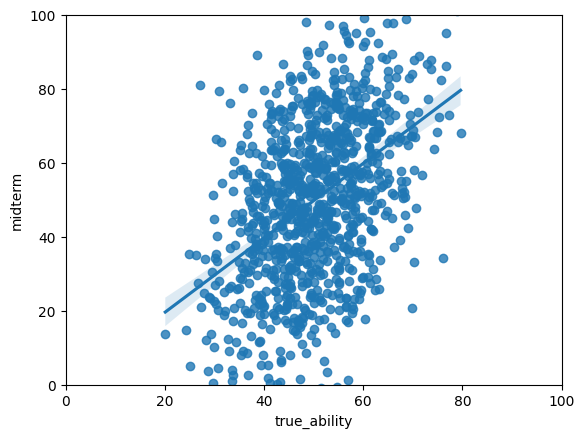

In [ ]:
ax = sns.regplot(data=data, x='true_ability', y='midterm', marker='o')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

In [ ]:
10000 - 4 * 0.04 * 100 * 400

3600.0

In [ ]:
model = ols('true_ability ~ midterm', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           true_ability   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     251.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           9.99e-51
Time:                        22:00:01   Log-Likelihood:                -3609.4
No. Observations:                1000   AIC:                             7223.
Df Residuals:                     998   BIC:                             7233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1765      0.690     58.250      0.000      38.823      41.530
midterm        0.1999      0.013     15.867      0.000       0.175       0.225
==============================================================================
Omnibus:                        1.802   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.736
Skew:                           0.039   Prob(JB):                        0.420
Kurtosis:                       2.811   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sigma = true_ability.var()
sigma_midterm = midterm.var()

a = res.params['midterm']

In [ ]:
(sigma - np.sqrt(sigma ** 2 - 4 * a ** 2 * sigma * sigma_midterm)) / (2 * a * sigma)

1.3988780249385313

Теперь попробуем наобород предсказать скор экзамена $X_i$ по настоящему скору $X$. Выражение для $\mathop{\mathbb{E}[X|x_i]}$ выглядит следующим образом:

$$
\mathop{\mathbb{E}[X_i|x]} = \mathop{\mathbb{E}[X_i]} + \frac{Cov(X, X_i)}{Var(X)}(X - \mathop{\mathbb{E}[X]}) = \\
= \mu + \frac{\sigma^2}{\sigma^2}(x - \mu) = x
$$

(0.0, 100.0)

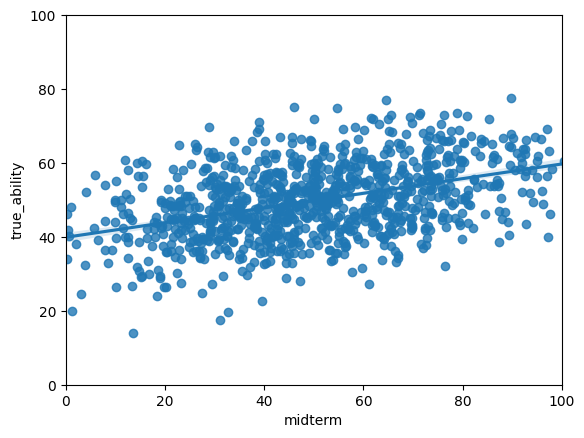

In [ ]:
ax = sns.regplot(data=data, x='midterm', y='true_ability', marker='o')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

In [ ]:
model = ols('midterm ~ true_ability', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                midterm   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           9.49e-52
Time:                        15:03:43   Log-Likelihood:                -4459.0
No. Observations:                1000   AIC:                             8922.
Df Residuals:                     998   BIC:                             8932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.7771      3.274     -0.543      0.587      -8.202       4.648
true_ability     1.0346      0.064     16.051      0.000       0.908       1.161
==============================================================================
Omnibus:                        1.558   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.467
Skew:                           0.091   Prob(JB):                        0.480
Kurtosis:                       3.045   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Теперь попробуем наобород предсказать скор финального экзамена $X_2$ по скору полусемместрового экзамена $X_1$. Выражение для $\mathop{\mathbb{E}[X_2|x_1]}$ выглядит следующим образом:

$$
\mathop{\mathbb{E}[X_2|x_1]} = \mathop{\mathbb{E}[X_2]} + \frac{Cov(X_1, X_2)}{Var(X_1)}(X_1 - \mathop{\mathbb{E}[X_1]}) = \\
= \mu + \frac{\sigma^2}{\sigma^2 + \sigma_1^2}(x_1 - \mu) = 50 + 0.2(x_1 - 50) = 40 + 0.2x_1
$$

(0.0, 100.0)

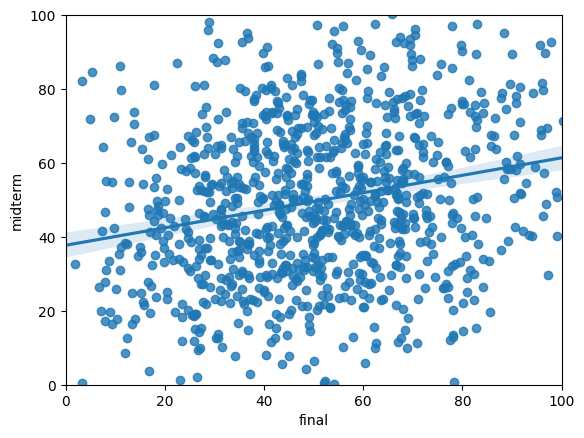

In [ ]:
ax = sns.regplot(data=data, x='final', y='midterm', marker='o')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

In [ ]:
model = ols('final ~ midterm', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  final   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     55.46
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           2.06e-13
Time:                        15:08:51   Log-Likelihood:                -4515.9
No. Observations:                1000   AIC:                             9036.
Df Residuals:                     998   BIC:                             9046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.5049      1.642     24.065      0.000      36.284      42.726
midterm        0.2225      0.030      7.447      0.000       0.164       0.281
==============================================================================
Omnibus:                        2.385   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                2.457
Skew:                           0.109   Prob(JB):                        0.293
Kurtosis:                       2.893   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""